In [3]:
from fastai.vision.all import *
from duckduckgo_search import DDGS
from time import sleep
#imports the libraries/apis for this project

In [5]:

# Searches sets the search terms... path sets the directory name
searches = ['Lakers jersey', 'Dortmund jersey']
path = Path('lakers_vs_dortmund')

# Creates directory if it doesn't exist
path.mkdir(exist_ok=True, parents=True)

# Iterate over each search term and sets the path/folder for the images we will train
for o in searches:
    dest = path/o
    dest.mkdir(exist_ok=True, parents=True)

    # Defines search modifiers for different contexts of jerseys
    modifiers = ['photo', 'action photo', 'fan photo']

    #we iterate through modifiers and create a dictionary of the results from our image search/request
    for mod in modifiers:
        imgDict = DDGS().images(f'{o} {mod}')
        
        # Here we create a new list of the urls for our searched images
        urls = [img['image'] for img in imgDict]

        # Downloads and resizes images and throw exception if try fails.
        try:
            download_images(dest, urls=urls)
        except Exception as e:
            print(f"Error downloading images for {o} {mod}: {e}")
        
        # Pause to avoid overloading the server
        sleep(10)

    
    resize_images(dest, max_size=400)

print("Image download and resizing complete!")


/Users/jamesstevens/anaconda3/envs/fastailesson1/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/jamesstevens/anaconda3/envs/fastailesson1/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/jamesstevens/anaconda3/envs/fastailesson1/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/jamesstevens/anaconda3/envs/fastailesson1/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/jamesstevens/anaconda3/envs/fastailesson1/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency e

Image download and resizing complete!


In [6]:
#After we've downloaded the images we are going to check if we can access the image files. if not, remove it and tell us the count of failed image paths
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

23

/Users/jamesstevens/anaconda3/envs/fastailesson1/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


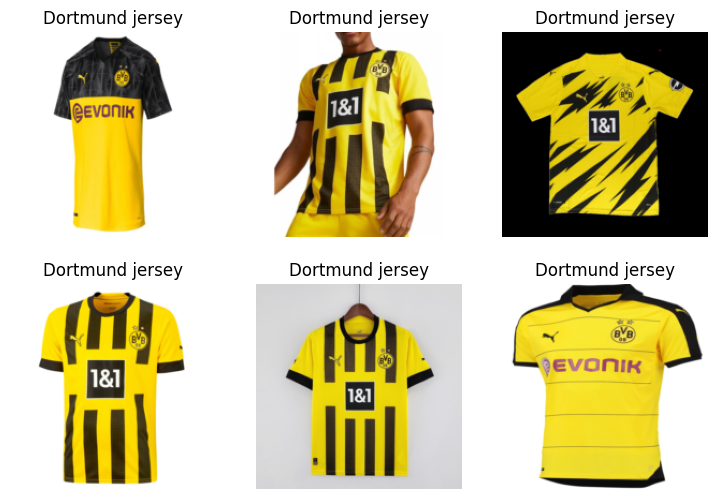

In [7]:
#this code defines our data processing pipeline... setting our data type to images, splitting our images into training and validation sets
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

/Users/jamesstevens/anaconda3/envs/fastailesson1/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


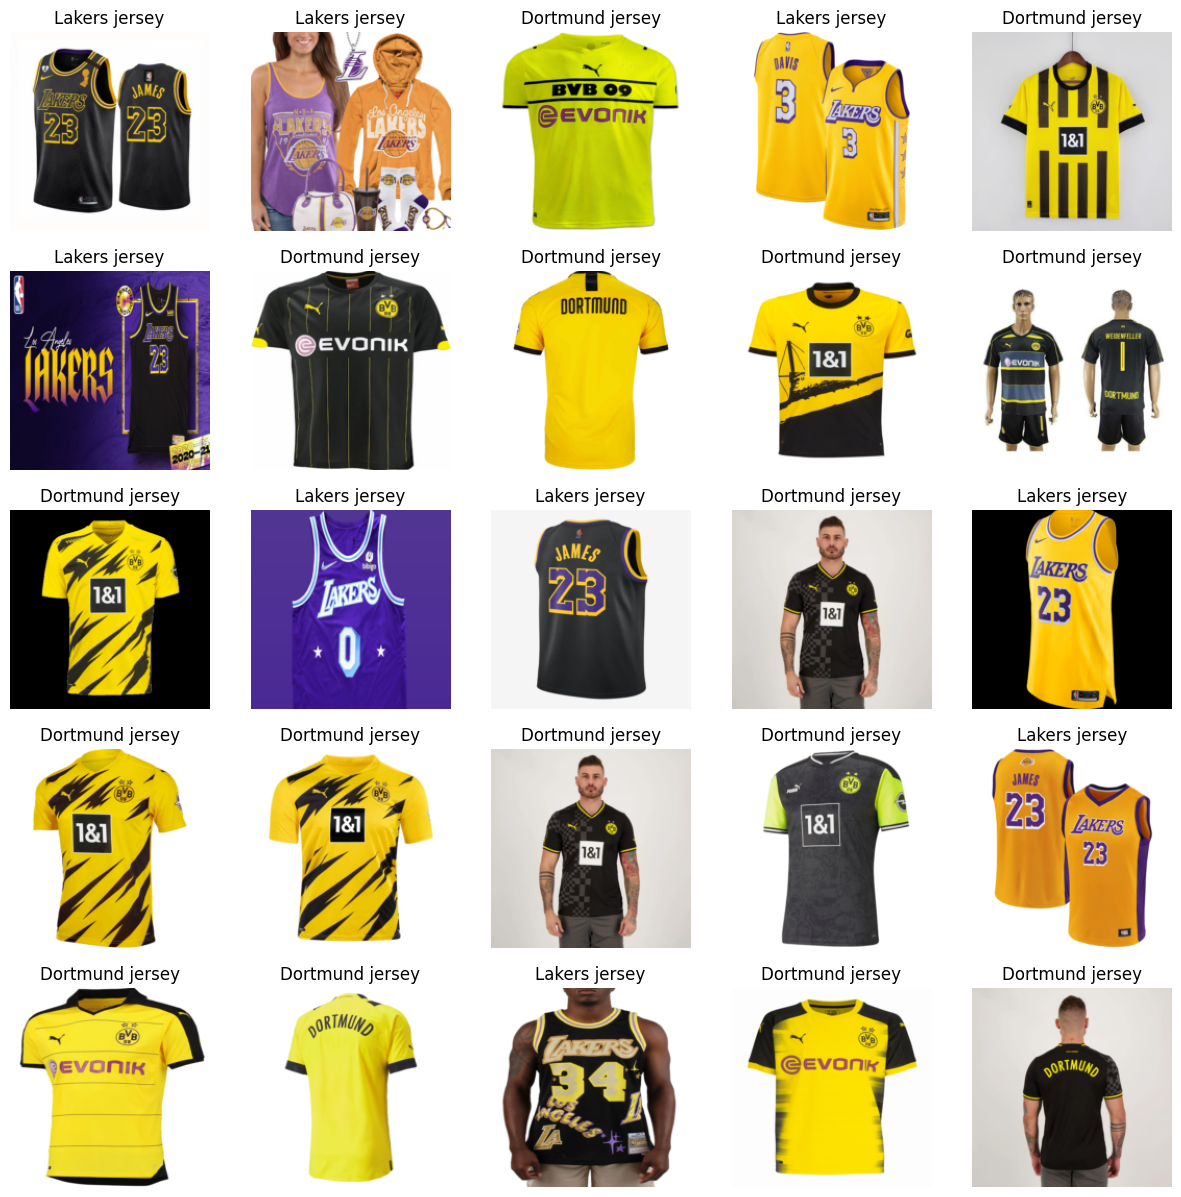

In [41]:
dls.show_batch(max_n=25)

In [8]:
#here we train our model from our collected data using the resnet CNN... then we fine tune for 3 epochs
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.573773,0.031092,0.011834,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.043241,0.002702,0.000000,00:18
1,0.033897,0.002414,0.000000,00:18
2,0.024945,0.005674,0.005917,00:17


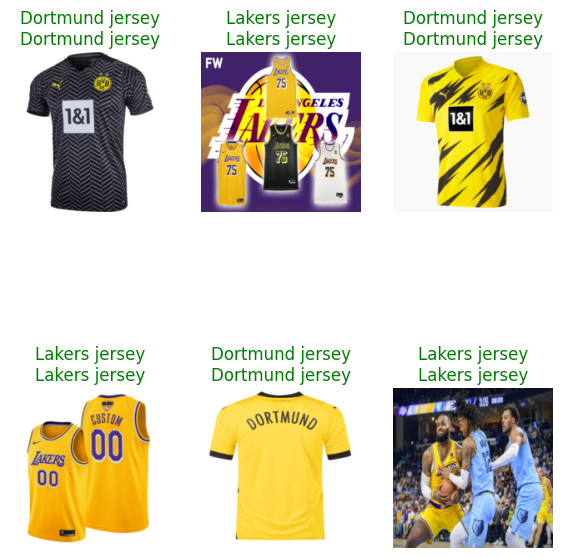

In [43]:
learn.show_results(max_n=6, figsize=(7,8))

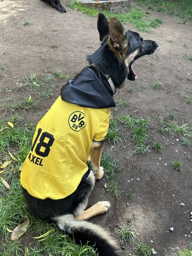

In [44]:
#here we collect a test image to see if our model can correctly classify dortmund and lakers jerseys
dest = 'dortdog.jpg'
download_url('https://images.loox.io/uploads/2023/8/17/micjrjQvx.jpg', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)

In [46]:
is_jersey, _, probs = learn.predict(PILImage.create('dortdog.jpg'))
print(f"This is a: {is_jersey}.")
print(f"Probability it's a Lakers jersey: {probs[0]:.4f}")
print(f"Probability it's a Dortmund jersey: {probs[1]:.4f}")

This is a: Dortmund jersey.
Probability it's a Lakers jersey: 0.9592
Probability it's a Dortmund jersey: 0.0408


In [48]:
is_jersey, _, probs = learn.predict(PILImage.create('dortdog.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Dortmund jersey
Probabilities: tensor([0.9592, 0.0408])


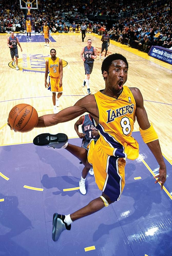

In [49]:
dest = 'kobeai.jpg'
download_url('https://m.media-amazon.com/images/I/71aNzvSYkUL._AC_UF1000,1000_QL80_.jpg', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)

In [50]:
is_jersey, _, probs = learn.predict(PILImage.create('kobeai.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Lakers jersey
Probabilities: tensor([1.5704e-06, 1.0000e+00])


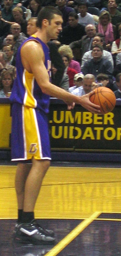

In [51]:
dest = 'mihm.jpg'
download_url('https://upload.wikimedia.org/wikipedia/commons/d/d2/Chris_Mihm_in_2005.jpg', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)

In [52]:
is_jersey, _, probs = learn.predict(PILImage.create('mihm.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Lakers jersey
Probabilities: tensor([3.5908e-05, 9.9996e-01])


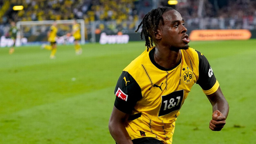

In [53]:
dest = 'dort.jpg'
download_url('https://a.espncdn.com/combiner/i?img=/media/motion/2024/0824/ss_20240824_144331404_2621802885/ss_20240824_144331404_2621802885.jpg&w=1256', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)

In [54]:
is_jersey, _, probs = learn.predict(PILImage.create('dort.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Lakers jersey
Probabilities: tensor([0.0424, 0.9576])


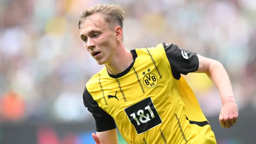

In [56]:
dest = 'dort1.jpg'
download_url('https://images2.minutemediacdn.com/image/upload/c_crop,w_5084,h_2859,x_0,y_113/c_fill,w_720,ar_16:9,f_auto,q_auto,g_auto/images/GettyImages/mmsport/395/01j6sb3jbckvhkdrgkaw.jpg', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)

In [58]:
is_jersey, _, probs = learn.predict(PILImage.create('dort1.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Dortmund jersey
Probabilities: tensor([0.6491, 0.3509])


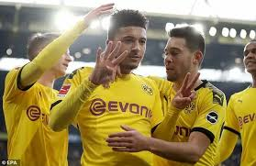

In [60]:
dest = 'dort2.jpg'
download_url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRna6C3hvFMwft5NkqEds3Oe612STaeeYo25A&s', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)



In [61]:
#in the above test examples, we notice that Lakers jerseys can be classified to a high degree of accuracy while dortmund jerseys return false negatives
#in the following cells we change the amount of fine tuning we are doing to try and minimize our error rate
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.014621,0.135281,0.037500,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.014109,0.069307,0.025000,00:07
1,0.008427,0.116676,0.025000,00:07
2,0.006274,0.084272,0.037500,00:07
3,0.004397,0.094182,0.050000,00:07
4,0.003257,0.091561,0.050000,00:07


In [62]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.614425,0.175256,0.050000,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.115785,0.103459,0.037500,00:08
1,0.063420,0.097584,0.025000,00:08


In [63]:
# in the following we continue to test our model and find that dortmund jerseys can be identified but we cannot determine what makes some images more successful than others
dest = 'dort2.jpg'
download_url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRna6C3hvFMwft5NkqEds3Oe612STaeeYo25A&s', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)

is_jersey, _, probs = learn.predict(PILImage.create('dort2.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Lakers jersey
Probabilities: tensor([9.3240e-04, 9.9907e-01])


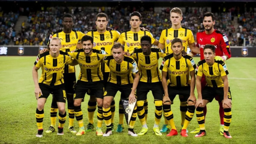

In [64]:
dest = 'dort3.jpg'
download_url('https://images2.minutemediacdn.com/image/upload/c_fill,w_1440,ar_16:9,f_auto,q_auto,g_auto/shape/cover/sport/821ddf7f01ba881a38098fc356e33a424ede6d82ac57c9128cc65532984edaf3.jpg', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)



In [67]:
is_jersey, _, probs = learn.predict(PILImage.create('dort3.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Lakers jersey
Probabilities: tensor([0.0057, 0.9943])


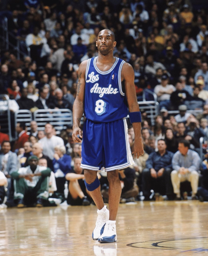

In [66]:
dest = 'lak1.jpg'
download_url('https://pbs.twimg.com/media/EqTFrJkXEAAHXgf?format=jpg&name=large', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)



In [68]:
is_jersey, _, probs = learn.predict(PILImage.create('lak1.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Lakers jersey
Probabilities: tensor([3.7709e-06, 1.0000e+00])


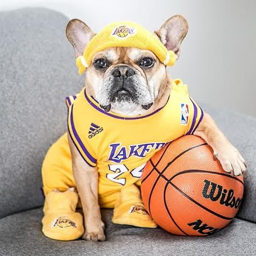

In [69]:
dest = 'lak2.jpg'
download_url('https://i.pinimg.com/736x/9a/fe/f0/9afef0f84c312357a3a19e51c99a5376.jpg', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)


In [70]:
is_jersey, _, probs = learn.predict(PILImage.create('lak2.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Lakers jersey
Probabilities: tensor([0.0818, 0.9182])


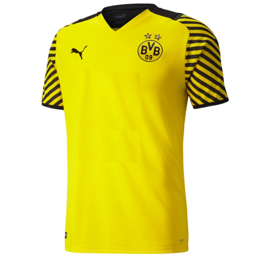

In [72]:
dest = 'dort4.jpg'
download_url('https://www.soccertracksuits.com/cdn/shop/products/borussia_dortmund_home_soccer_jersey_2021_2022_puma_no_sponsor_unsponsored_maillot_foot_domicile_yellow_shirt_football_camiseta_futbol_maglia_calcio.jpg?v=1674916543', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)


In [73]:
is_jersey, _, probs = learn.predict(PILImage.create('dort4.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Dortmund jersey
Probabilities: tensor([9.9995e-01, 5.4401e-05])


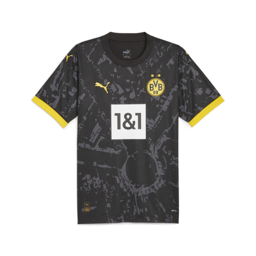

In [74]:
dest = 'dort5.jpg'
download_url('https://goalkicksoccer.com/cdn/shop/files/puma-mens-borussia-dortmund-2324-away-jersey-77061202-apparel-puma-adult-large-176197_5000x.jpg?v=1703682704', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)

In [75]:
is_jersey, _, probs = learn.predict(PILImage.create('dort5.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Dortmund jersey
Probabilities: tensor([9.9988e-01, 1.2331e-04])


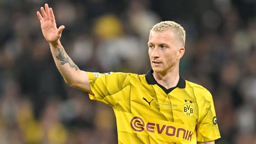

In [76]:
dest = 'reus.jpg'
download_url('https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcTSNdq0rsLQuMKUwhTuE2uUGJan63N0s35O4k6UXfEKdkAqj2fa', dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)

In [77]:
is_jersey, _, probs = learn.predict(PILImage.create('reus.jpg'))
print(f"Predicted class: {is_jersey}")
print(f"Probabilities: {probs}")


Predicted class: Dortmund jersey
Probabilities: tensor([0.9860, 0.0140])
